In [ ]:
"""Examine SVD of convolution for 1D case"""

In [23]:
import matplotlib.pyplot as plt
import numpy as np

from common.operators import custom_operator_1d
from deblurring.blurring import gaussian

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


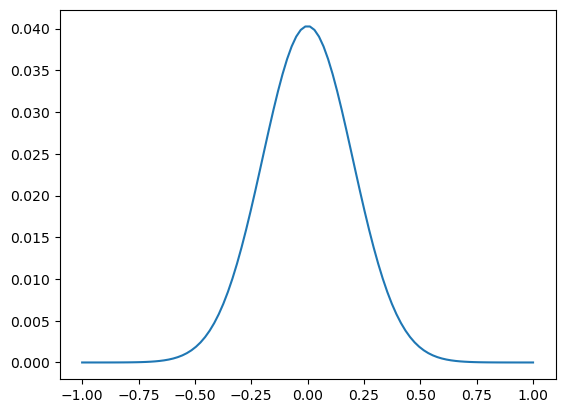

In [29]:
"""Generate and display Gaussian kernel"""

N = 100
mu = 0.0
sigma = 0.2

x = np.linspace(-1.0, 1.0, N)
y = gaussian(x, mu, sigma)
assert np.isclose(np.sum(y), 1.0)

plt.plot(x, y)
plt.show()

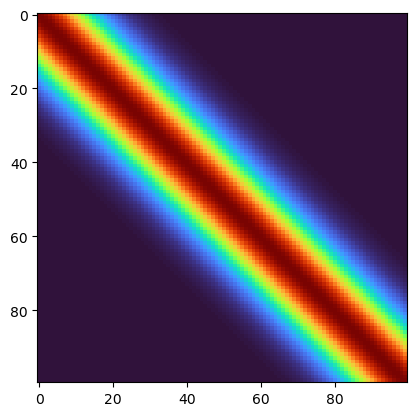

In [39]:
"""Generate and display convolutional matrix for Gaussian blurring"""

conv_matrix = custom_operator_1d(kernel=y, arr_size=N, conv_mode="same").toarray()

plt.imshow(conv_matrix, cmap="turbo")
plt.show()

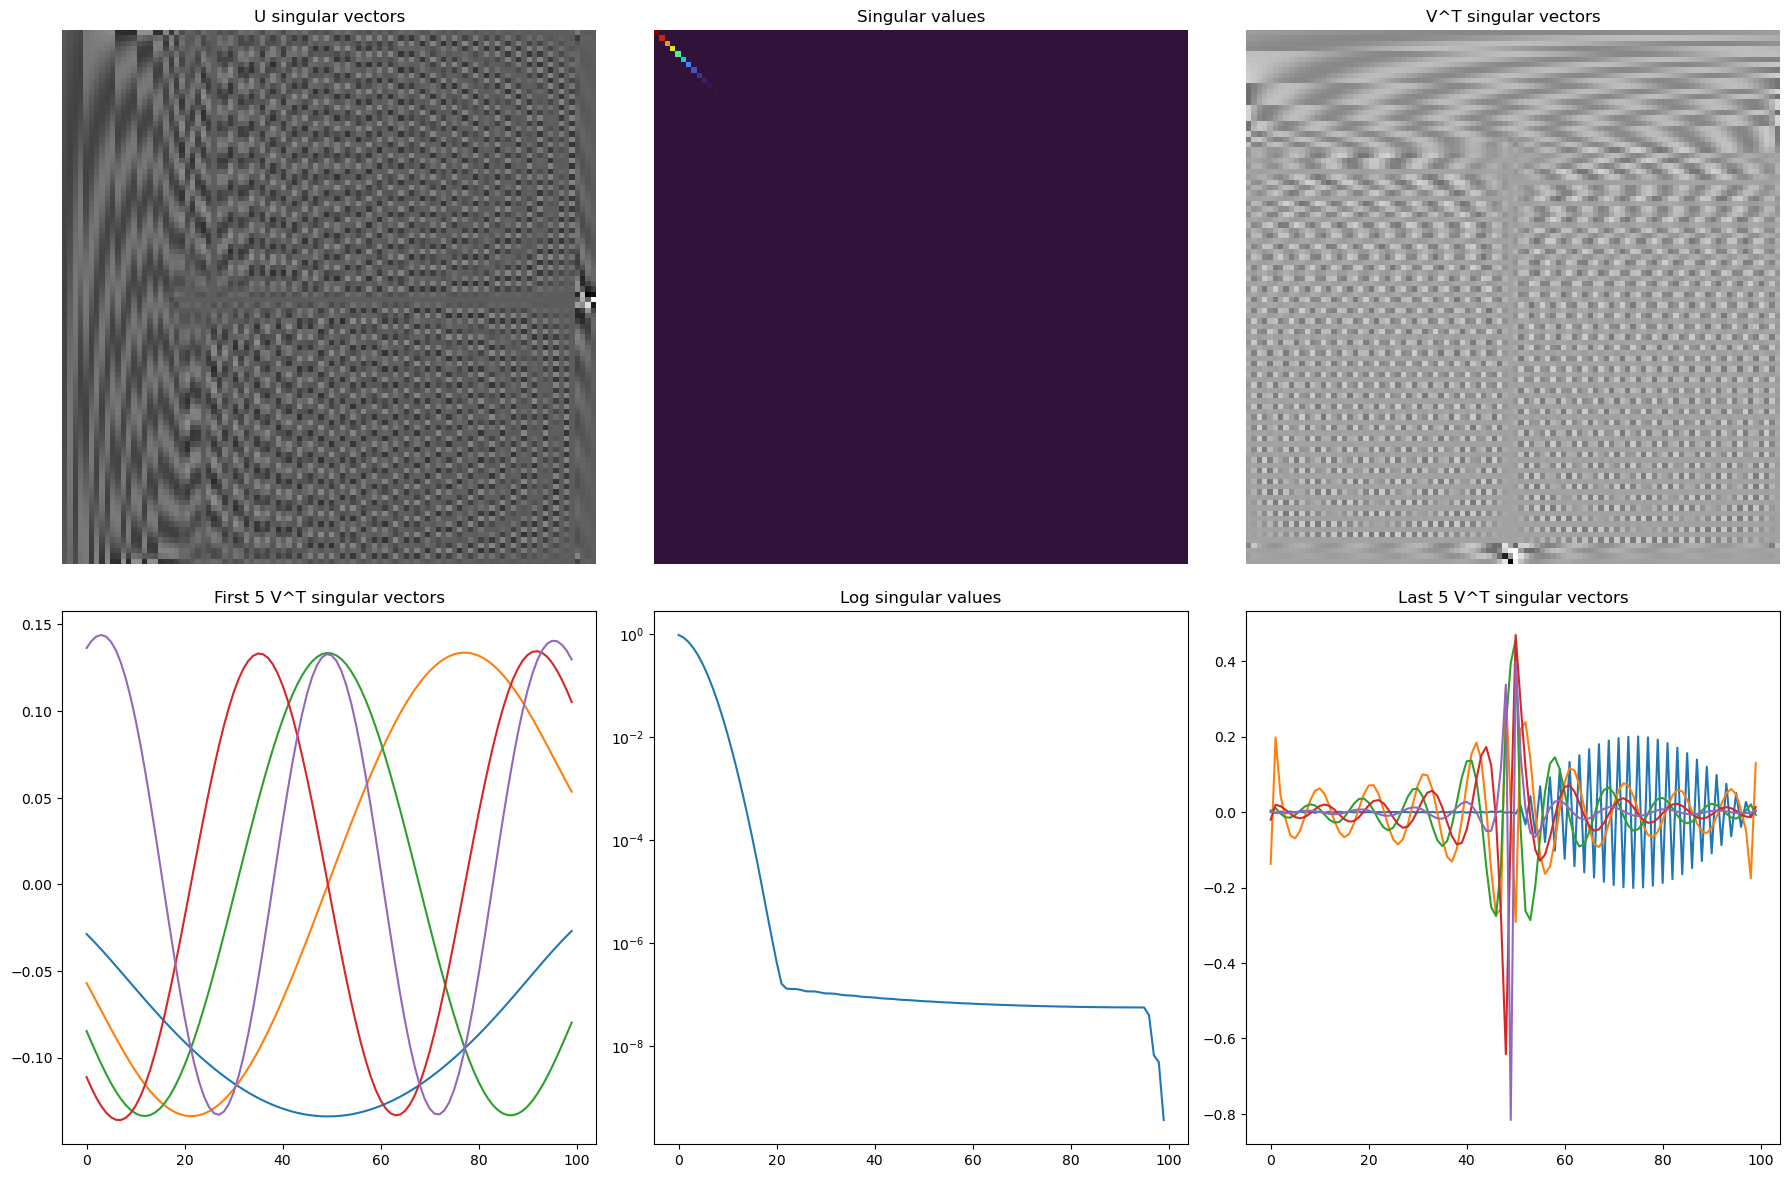

In [46]:
"""Perform singular value decomposition of convolutional matrix for n=100"""

U, W, Vt = np.linalg.svd(conv_matrix)
W_diag = np.diag(W)
assert np.isclose(np.linalg.norm(U @ W_diag @ Vt - conv_matrix), 0.0)

sing_vals = np.arange(0, W.shape[0])

fig = plt.figure(figsize=(18, 12))
plt.subplot(2, 3, 1)
plt.imshow(U, cmap="gray")
plt.title("U singular vectors")
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(W_diag, cmap="turbo")
plt.title("Singular values")
plt.axis("off")
plt.subplot(2, 3, 3)
plt.imshow(Vt, cmap="gray")
plt.title("V^T singular vectors")
plt.axis("off")

plt.subplot(2, 3, 4)
for i in range(5):
    plt.plot(sing_vals, Vt[i, :])
plt.gca().set_box_aspect(1)
plt.title("First 5 V^T singular vectors")

plt.subplot(2, 3, 5)
plt.semilogy(sing_vals, W.flatten())
plt.title("Log singular values")
plt.gca().set_box_aspect(1)

plt.subplot(2, 3, 6)
for i in range(Vt.shape[0] - 5, Vt.shape[0]):
    plt.plot(sing_vals, Vt[i, :])
plt.gca().set_box_aspect(1)
plt.title("Last 5 V^T singular vectors")

plt.tight_layout()
plt.show()